### Домашнее задание по теме «Ансамблирование» 


- Теперь решаем задачу регрессии - предскажем цены на недвижимость. Использовать датасет https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data (train.csv)

- Построить случайный лес, вывести важность признаков

- Обучить стекинг как минимум 3х моделей, использовать хотя бы 1 линейную модель и 1 нелинейную

- В качестве решения: Jupyter notebook с кодом, комментариями и графиками

In [265]:
import pandas as pd
import numpy as np

In [266]:
data = pd.read_csv('train.csv')

In [267]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [268]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

Рассмотрим все категориальные признаки.

In [269]:
data.MiscFeature.value_counts()

Shed    49
Othr     2
Gar2     2
TenC     1
Name: MiscFeature, dtype: int64

#### Мы можем удалить лишние признаки, которые в обучении нам не понадобиться.

- id
- Street  
- Utilities  
- Condition2   
- RoofMatl  
- Heating  
- GarageQual  
- GarageCond  
- PoolQC  
- MiscFeature

In [270]:
data.drop(['Street', 'Utilities', 'Condition2', 'RoofMatl', 'Heating', 'GarageQual', 'GarageCond', 'PoolQC', 'MiscFeature'], axis='columns', inplace=True)

In [271]:
data.drop(['Id'], axis='columns', inplace=True)

In [272]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 71 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1452 non-null object
MasVnrArea       1452 non-null float64
ExterQual        1460 non-null object
ExterCond        1460 non

In [273]:
categorical_columns = data.columns[data.dtypes == 'object']
categorical_columns

Index(['MSZoning', 'Alley', 'LotShape', 'LandContour', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle',
       'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'PavedDrive', 'Fence', 'SaleType', 'SaleCondition'],
      dtype='object')

In [274]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [275]:
for var in categorical_columns:
    data[var].replace(np.nan, 'Nan', inplace=True)
    data.loc[:, var] = labelencoder.fit_transform(data.loc[:, var] )

In [276]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 71 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null int64
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Alley            1460 non-null int64
LotShape         1460 non-null int64
LandContour      1460 non-null int64
LotConfig        1460 non-null int64
LandSlope        1460 non-null int64
Neighborhood     1460 non-null int64
Condition1       1460 non-null int64
BldgType         1460 non-null int64
HouseStyle       1460 non-null int64
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null int64
Exterior1st      1460 non-null int64
Exterior2nd      1460 non-null int64
MasVnrType       1460 non-null int64
MasVnrArea       1452 non-null float64
ExterQual        1460 non-null int64
ExterCond        1460 non-null int64
F

#### Удалим пустые значения

In [277]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1121 entries, 0 to 1459
Data columns (total 71 columns):
MSSubClass       1121 non-null int64
MSZoning         1121 non-null int64
LotFrontage      1121 non-null float64
LotArea          1121 non-null int64
Alley            1121 non-null int64
LotShape         1121 non-null int64
LandContour      1121 non-null int64
LotConfig        1121 non-null int64
LandSlope        1121 non-null int64
Neighborhood     1121 non-null int64
Condition1       1121 non-null int64
BldgType         1121 non-null int64
HouseStyle       1121 non-null int64
OverallQual      1121 non-null int64
OverallCond      1121 non-null int64
YearBuilt        1121 non-null int64
YearRemodAdd     1121 non-null int64
RoofStyle        1121 non-null int64
Exterior1st      1121 non-null int64
Exterior2nd      1121 non-null int64
MasVnrType       1121 non-null int64
MasVnrArea       1121 non-null float64
ExterQual        1121 non-null int64
ExterCond        1121 non-null int64
F

In [278]:
X = data[data.columns[:-1]]
y = data['SalePrice']

In [279]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(n_estimators=10, max_depth=5, min_samples_leaf=20, max_features=0.5, n_jobs=-1)
clf_rf.fit(X, y)   

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features=0.5, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [280]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Отобразим важность признаков.

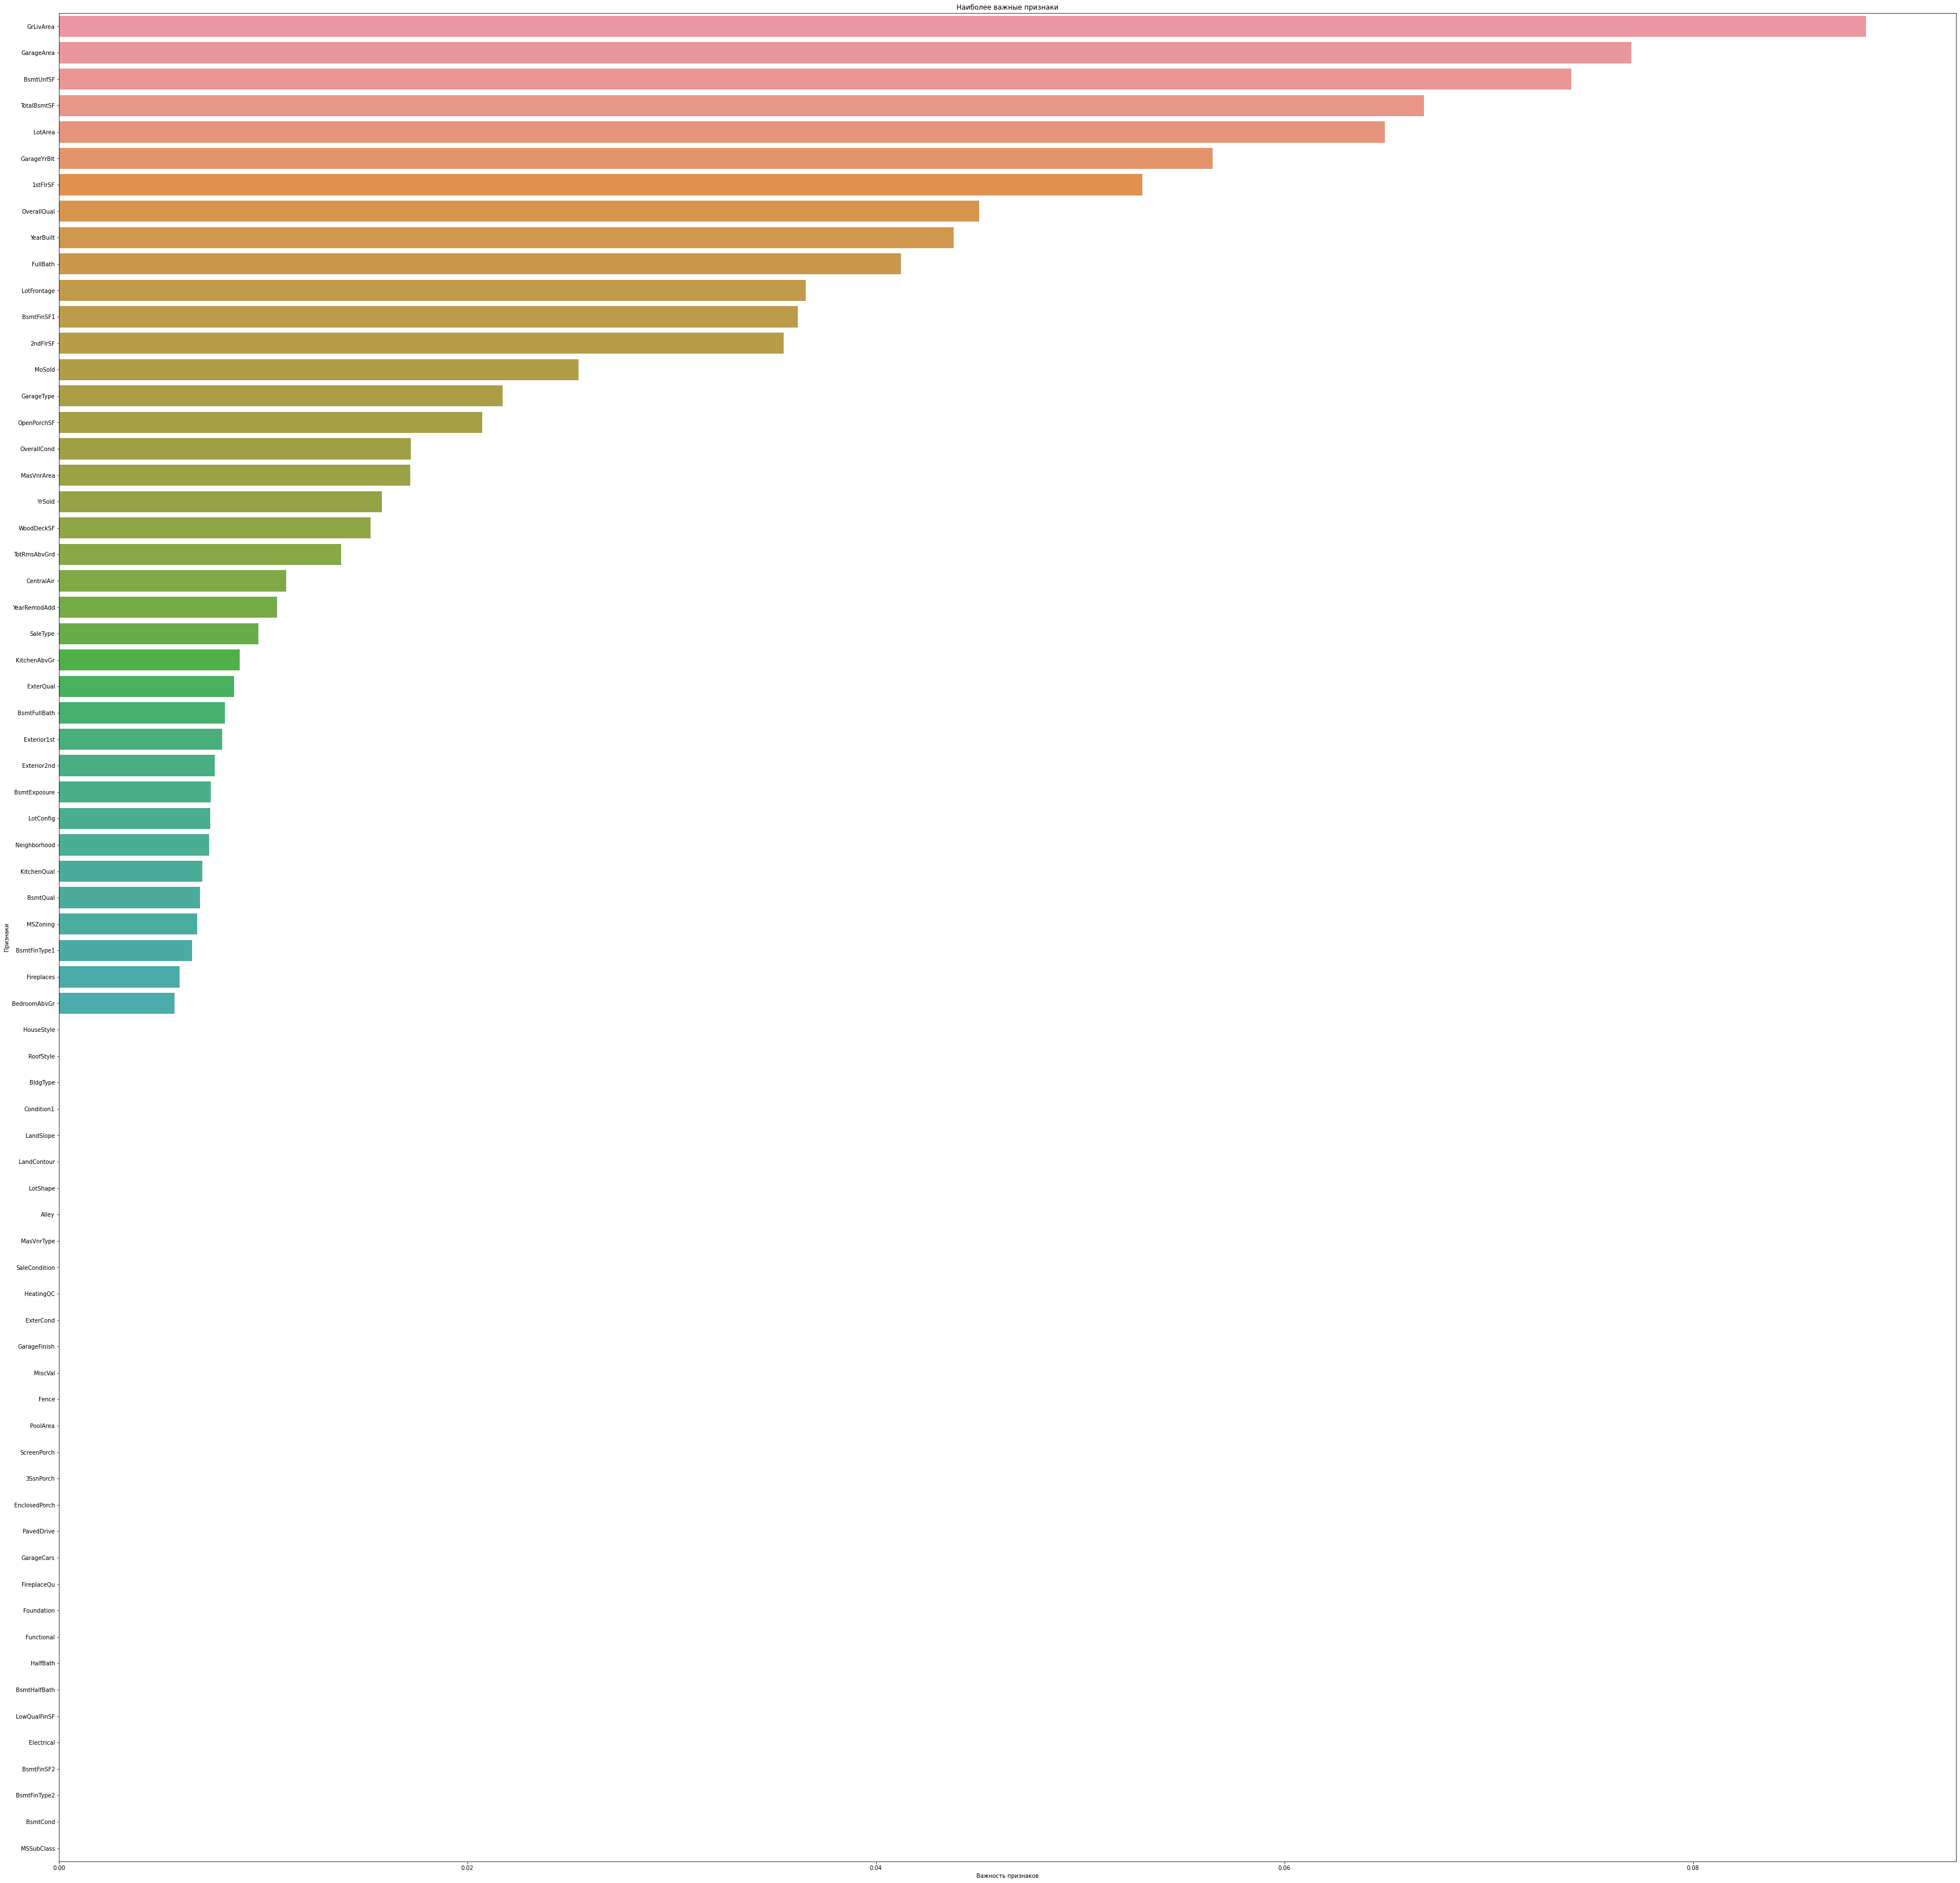

In [281]:
headers = list(X.columns.values)
impot = pd.Series(clf_rf.feature_importances_,index=headers).sort_values(ascending=False)
f, ax = plt.subplots(figsize=(60, 60))
sns.barplot(x=impot, y=impot.index)

plt.xlabel('Важность признаков')
plt.ylabel('Признаки')
plt.title("Наиболее важные признаки")
plt.show()

#### Как мы видем что много признаков, которые вообще не важны.

In [282]:
feature_imp_n = impot[impot > 0]
len(feature_imp_n)

38

In [283]:
feature_imp_n_index = impot.index[:len(feature_imp_n)]

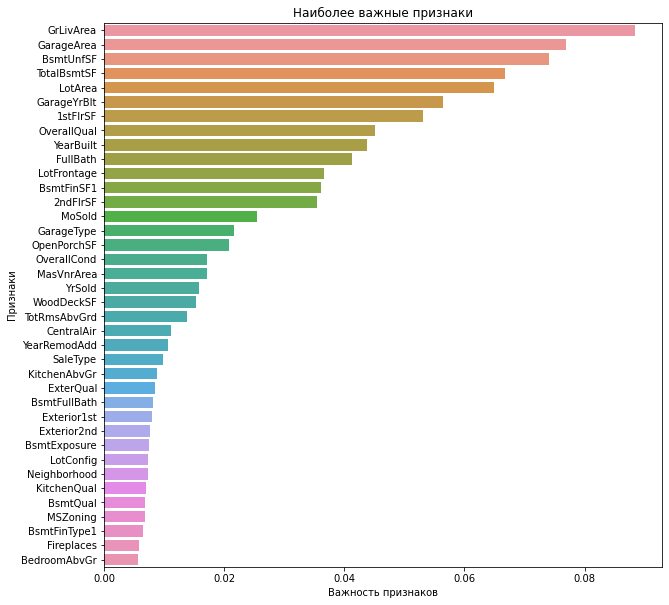

In [284]:
f, ax = plt.subplots(figsize=(10, 10))
sns.barplot(x=feature_imp_n, y=feature_imp_n_index)

plt.xlabel('Важность признаков')
plt.ylabel('Признаки')
plt.title("Наиболее важные признаки")
plt.show()

In [285]:
data_N = pd.read_csv('train.csv')

In [286]:
data_N.drop(['Street', 'Utilities', 'Condition2', 'RoofMatl', 'Heating', 'GarageQual', 'GarageCond', 'PoolQC', 'MiscFeature'], axis='columns', inplace=True)
data_N.drop(['Id'], axis='columns', inplace=True)

In [287]:
categorical_columns = data_N.columns[data_N.dtypes == 'object']
categorical_columns

Index(['MSZoning', 'Alley', 'LotShape', 'LandContour', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle',
       'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'PavedDrive', 'Fence', 'SaleType', 'SaleCondition'],
      dtype='object')

In [288]:
for var in categorical_columns:
    data_N[var].replace(np.nan, 'Nan', inplace=True)
    data_N.loc[:, var] = labelencoder.fit_transform(data_N.loc[:, var] )

In [289]:
data_N.dropna(inplace=True)
data_N

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,65.0,8450,1,3,3,4,0,5,...,0,0,0,4,0,2,2008,8,4,208500
1,20,3,80.0,9600,1,3,3,2,0,24,...,0,0,0,4,0,5,2007,8,4,181500
2,60,3,68.0,11250,1,0,3,4,0,5,...,0,0,0,4,0,9,2008,8,4,223500
3,70,3,60.0,9550,1,0,3,0,0,6,...,0,0,0,4,0,2,2006,8,0,140000
4,60,3,84.0,14260,1,0,3,2,0,15,...,0,0,0,4,0,12,2008,8,4,250000
5,50,3,85.0,14115,1,0,3,4,0,11,...,320,0,0,2,700,10,2009,8,4,143000
6,20,3,75.0,10084,1,3,3,4,0,21,...,0,0,0,4,0,8,2007,8,4,307000
8,50,4,51.0,6120,1,3,3,4,0,17,...,0,0,0,4,0,4,2008,8,0,129900
9,190,3,50.0,7420,1,3,3,0,0,3,...,0,0,0,4,0,1,2008,8,4,118000
10,20,3,70.0,11200,1,3,3,4,0,19,...,0,0,0,4,0,2,2008,8,4,129500


#### Делим всю выборку на 4 фолда 

In [290]:
from sklearn.model_selection import train_test_split
X = data_N[data_N.columns[:-1]]
y = data_N['SalePrice'] 
X_train_1, X_train_2, y_train_1, y_train_2 = train_test_split(X, y, test_size=0.5, random_state = 1000)

In [291]:
X_train_3, X_train_4, y_train_3, y_train_4 = train_test_split(X_train_1, y_train_1, test_size=0.5, random_state = 1000)

In [292]:
X_train_1, X_train_2, y_train_1, y_train_2 = train_test_split(X_train_2, y_train_2, test_size=0.5, random_state = 1000)

#### Получили 4 фолда

#### 1. RandomForestClassifier

In [293]:
from sklearn.ensemble import RandomForestClassifier
RFC= RandomForestClassifier(n_estimators=10, max_depth=5, min_samples_leaf=20, max_features=0.5, n_jobs=-1)

#### 2. LinearRegression

In [294]:
from sklearn.linear_model import LinearRegression
LinR = LinearRegression()

#### 3. SVM

In [295]:
from sklearn import svm
LSVM = svm.SVC(kernel='linear', C=1.0)

#### Удалим нулевые значения, предварительно обратно соединив X и y

In [296]:
X_1 = pd.concat([X_train_1, y_train_1], axis=1)
X_2 = pd.concat([X_train_2, y_train_2], axis=1)
X_3 = pd.concat([X_train_3, y_train_3], axis=1)

In [297]:
X_1.dropna(inplace=True)
X_2.dropna(inplace=True)
X_3.dropna(inplace=True)

In [298]:
X_1.shape, X_2.shape, X_3.shape

((280, 71), (281, 71), (280, 71))

#### Обучим наши три модели.

In [299]:
X_train_1 = X_1[X_1.columns[:-1]]
y_train_1 = X_1['SalePrice']
Lin_reg =  LinR.fit(X_train_1, y_train_1) 

X_train_2 = X_2[X_1.columns[:-1]]
y_train_2 = X_2['SalePrice']
svm = LSVM.fit(X_train_2, y_train_2) 

X_train_3 = X_3[X_1.columns[:-1]]
y_train_3 = X_3['SalePrice']
rf = RFC.fit(X_train_3, y_train_3)     

#### Для тестирования моделей возьмем данные из 4 фолда.

In [300]:
X_4 = pd.concat([X_train_4, y_train_4], axis=1)
X_4.dropna(inplace=True)

In [301]:
X_4.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
255,60,3,66.0,8738,1,0,3,4,0,8,...,0,0,0,4,0,2,2006,8,4,230000
323,20,4,49.0,5820,1,3,3,4,0,17,...,0,0,0,4,0,7,2006,8,4,126175
1208,20,3,70.0,7763,1,3,3,4,0,12,...,0,0,0,4,0,10,2008,8,4,140000
200,20,4,80.0,8546,1,3,3,0,0,7,...,0,0,0,4,0,3,2010,8,4,140000
1292,70,4,60.0,6600,1,3,3,0,0,17,...,0,0,0,4,0,12,2009,8,4,107500


In [302]:
#pd.options.mode.chained_assignment = None

X_train_4_lin = X_4[X_4.columns[:-1]]
X_train_4_rfc = X_4[X_4.columns[:-1]]
categorical_columns = X_train_4_lin.columns[X_train_4_lin.dtypes == 'object']

for var in categorical_columns:
    X_train_4_lin.drop([var], axis='columns', inplace=True)

In [303]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
for var in categorical_columns:
    X_train_4_rfc[var].replace(np.nan, 'Nan', inplace=True)
    X_train_4_rfc.loc[:, var] = labelencoder.fit_transform(X_train_4_rfc.loc[:, var] )

#### Прогнозы наших моделей

In [305]:
y_pred_lin = Lin_reg.predict(X_train_4_lin)
y_pred_lsvm = svm.predict(X_train_4_lin)
y_pred_rfc = rf.predict(X_train_4_rfc)

In [306]:
len(y_pred_rfc)

280

In [307]:
y_train_4 = X_4['SalePrice']

In [308]:
len(y_train_4)

280

In [309]:
df_1 = pd.DataFrame(y_pred_lin)
df_2 = pd.DataFrame(y_pred_lsvm)
df_3 = pd.DataFrame(y_pred_rfc)
X_train_all = pd.concat([df_1, df_2, df_3], axis=1)

In [311]:
X_train_all.head()

,0,0,0
0,249780.706477,303477,250000
1,93058.394564,112500,119000
2,146081.800134,138000,144000
3,135662.555299,164990,155000
4,110777.352399,165400,117000


#### Linear Regression

In [312]:
from sklearn.metrics import mean_absolute_error
reg = LinearRegression().fit(X_train_all, y_train_4)
print(f'Weights: {reg.coef_}')
print(f'Bias: {reg.intercept_}')

pred_values = reg.predict(X_train_all)
print('Error: {}'.format(mean_absolute_error(pred_values, y_train_4)))

Weights: [0.79024626 0.04700591 0.13700572]
Bias: 10512.156648213597
Error: 21304.166288590543


In [313]:
print(f'{23413/255307 * 100:.2f}%') 

9.17%
